<a href="https://colab.research.google.com/github/ezsourcecode/git-practice/blob/main/ADHD_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

In [3]:
disorder = pd.read_excel('disorder (2).xlsx', sheet_name = 5, header = 0)
disorder

,성별,연령구분,2018년,2019년,2020년,2021년,2022년
0,남,0~9세,437,594,554,640,837
1,남,10~19세,1111,1169,1175,1314,1746
2,남,20~29세,456,546,704,844,1142
3,남,30~39세,174,250,329,445,760
4,남,40~49세,55,68,89,113,188
...,...,...,...,...,...,...,...
5495,여,60~69세,0,0,0,0,0
5496,여,70~79세,0,0,0,0,0
5497,여,80~89세,0,0,0,0,0
5498,여,90~99세,0,0,0,0,0


In [4]:
disorder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      5500 non-null   object
 1   연령구분    5500 non-null   object
 2   2018년   5500 non-null   int64 
 3   2019년   5500 non-null   int64 
 4   2020년   5500 non-null   int64 
 5   2021년   5500 non-null   int64 
 6   2022년   5500 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 300.9+ KB


In [5]:
df = disorder.groupby(['성별', '연령구분']).sum()
df

2018년  2019년  2020년  2021년  2022년
성별 연령구분                                      
남  0~9세     17212  20888  20024  26013  33532
   100세 이상      0      0      0      0      0
   10~19세   26735  29213  29743  34616  43702
   20~29세    5654   7924  10563  13364  18767
   30~39세    1344   2511   3842   5708   9709
   40~49세     362    611    866   1322   2456
   50~59세      20     34    106    199    327
   60~69세       0      0      0      0      0
   70~79세       0      0      0      0      0
   80~89세       0      0      0      0      0
   90~99세       0      0      0      0      0
여  0~9세      3115   4000   4358   6177   8084
   100세 이상      0      0      0      0      0
   10~19세    6175   7220   7944   9917  14557
   20~29세    2165   4093   6724  10792  18520
   30~39세     532   1314   2198   4020   8526
   40~49세     187    399    558   1040   2296
   50~59세       0     23     43    117    288
   60~69세       0      0      0      0     25
   70~79세       0      0      0      0      0
   80~89세       0      0      0      0      0
   90~99세       0      0      0      0      0

In [6]:
df = df.loc[df.index.get_level_values('연령구분') != '100세 이상']

In [7]:
df

2018년  2019년  2020년  2021년  2022년
성별 연령구분                                     
남  0~9세    17212  20888  20024  26013  33532
   10~19세  26735  29213  29743  34616  43702
   20~29세   5654   7924  10563  13364  18767
   30~39세   1344   2511   3842   5708   9709
   40~49세    362    611    866   1322   2456
   50~59세     20     34    106    199    327
   60~69세      0      0      0      0      0
   70~79세      0      0      0      0      0
   80~89세      0      0      0      0      0
   90~99세      0      0      0      0      0
여  0~9세     3115   4000   4358   6177   8084
   10~19세   6175   7220   7944   9917  14557
   20~29세   2165   4093   6724  10792  18520
   30~39세    532   1314   2198   4020   8526
   40~49세    187    399    558   1040   2296
   50~59세      0     23     43    117    288
   60~69세      0      0      0      0     25
   70~79세      0      0      0      0      0
   80~89세      0      0      0      0      0
   90~99세      0      0      0      0      0

In [8]:
df_noidx = df.reset_index().copy()
df_noidx

,성별,연령구분,2018년,2019년,2020년,2021년,2022년
0,남,0~9세,17212,20888,20024,26013,33532
1,남,10~19세,26735,29213,29743,34616,43702
2,남,20~29세,5654,7924,10563,13364,18767
3,남,30~39세,1344,2511,3842,5708,9709
4,남,40~49세,362,611,866,1322,2456
5,남,50~59세,20,34,106,199,327
6,남,60~69세,0,0,0,0,0
7,남,70~79세,0,0,0,0,0
8,남,80~89세,0,0,0,0,0
9,남,90~99세,0,0,0,0,0


In [9]:
df_noidx.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
성별,남,남,남,남,남,남,남,남,남,남,여,여,여,여,여,여,여,여,여,여
연령구분,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세
2018년,17212,26735,5654,1344,362,20,0,0,0,0,3115,6175,2165,532,187,0,0,0,0,0
2019년,20888,29213,7924,2511,611,34,0,0,0,0,4000,7220,4093,1314,399,23,0,0,0,0
2020년,20024,29743,10563,3842,866,106,0,0,0,0,4358,7944,6724,2198,558,43,0,0,0,0
2021년,26013,34616,13364,5708,1322,199,0,0,0,0,6177,9917,10792,4020,1040,117,0,0,0,0
2022년,33532,43702,18767,9709,2456,327,0,0,0,0,8084,14557,18520,8526,2296,288,25,0,0,0


In [10]:
ADHD = ['2018년', '2019년', '2020년', '2021년', '2022년']
ADHD_s = df_noidx.groupby('성별')[ADHD].sum()

In [11]:
df_noidx

,성별,연령구분,2018년,2019년,2020년,2021년,2022년
0,남,0~9세,17212,20888,20024,26013,33532
1,남,10~19세,26735,29213,29743,34616,43702
2,남,20~29세,5654,7924,10563,13364,18767
3,남,30~39세,1344,2511,3842,5708,9709
4,남,40~49세,362,611,866,1322,2456
5,남,50~59세,20,34,106,199,327
6,남,60~69세,0,0,0,0,0
7,남,70~79세,0,0,0,0,0
8,남,80~89세,0,0,0,0,0
9,남,90~99세,0,0,0,0,0


In [12]:
ADHD_s = pd.DataFrame(ADHD_s, index=['남', '여'])
ADHD_s

,2018년,2019년,2020년,2021년,2022년
남,51327,61181,65144,81222,108493
여,12174,17049,21825,32063,52296


In [13]:
ADHD_s_t = ADHD_s.T
ADHD_s_t

,남,여
2018년,51327,12174
2019년,61181,17049
2020년,65144,21825
2021년,81222,32063
2022년,108493,52296


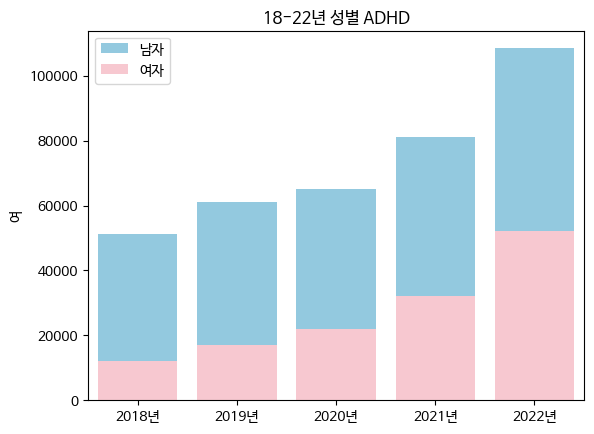

In [20]:
# 막대 그래프 그리기
import seaborn as sns
sns.barplot(x=ADHD_s_t.index, y='남', data=ADHD_s_t, label='남자', color='skyblue')
sns.barplot(x=ADHD_s_t.index, y='여', data=ADHD_s_t, label='여자', color='pink')

# 그래프에 제목과 범례 추가
plt.title('18-22년 성별 ADHD')
plt.legend()

# 그래프 표시
plt.show()

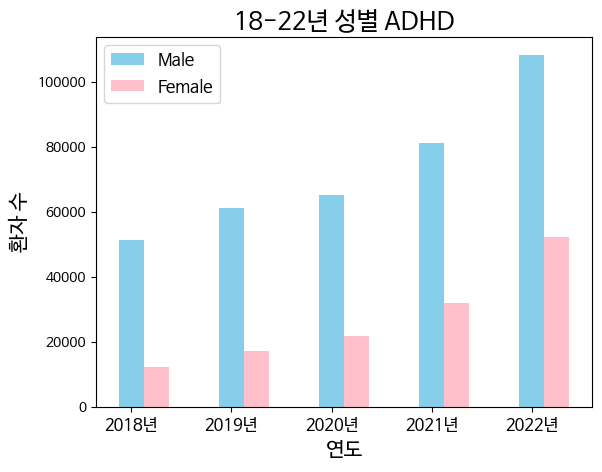

In [35]:
bar_width = 0.25
label = ['2018년', '2019년', '2020년', '2021년', '2022년']
index_values = range(len(ADHD_s_t.index))

p1 = plt.bar(ADHD_s_t.index, ADHD_s_t['남'],
             bar_width,
             color='skyblue',
             label='남')

p2 = plt.bar([i + bar_width for i in index_values], ADHD_s_t['여'],
             bar_width,
             color='pink',
             label='Female')

plt.title('18-22년 성별 ADHD', fontsize=18)
plt.ylabel('환자 수', fontsize=15)
plt.xlabel('연도', fontsize=15)
plt.xticks(index_values, label, fontsize=12)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=12)
plt.show()